# Credit Card Applications

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

We'll use the Credit Card Approval dataset from the UCI Machine Learning Repository http://archive.ics.uci.edu/ml/datasets/credit+approval. The structure of this notebook is as follows:

First, we will start off by loading and viewing the dataset.

1) We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.

2) We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
After our data is in good shape, we will do some exploratory data analysis to build our intuitions.

3) Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.

First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names

In [1]:
# Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset 

df = pd.read_csv('crx.data')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


## Inspecting the applications

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but this blog ( http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features.

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [3]:
df.columns = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education Level', 'Ethnicity', 
            'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Drivers License', 'Citizen', 
              'ZipCode', 'Income', 'Approval Status']

In [4]:
df.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,ZipCode,Income,Approval Status
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [5]:
df.shape

(689, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
Gender             689 non-null object
Age                689 non-null object
Debt               689 non-null float64
Married            689 non-null object
Bank Customer      689 non-null object
Education Level    689 non-null object
Ethnicity          689 non-null object
Years Employed     689 non-null float64
Prior Default      689 non-null object
Employed           689 non-null object
Credit Score       689 non-null int64
Drivers License    689 non-null object
Citizen            689 non-null object
ZipCode            689 non-null object
Income             689 non-null int64
Approval Status    689 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Debt,Years Employed,Credit Score,Income
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:

1) If we look carefully we'll notice that the features 'Debt', 'Years Employed', 'Credit Score', and 'Income' contain numeric values (of types float64, float64, int64 and int64 respectively). However, the 'Age' feature is a string so it needs to be coverted to Int type.

2) More so, since the 'Age' feature didn't come up in the descriptive stats above, it suggests there's probably a problem with the value(s) of the feature.

3) The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 0 - 67, and some have a range of 0 - 100000.The values seems quite far off so we might need to normalize them.

First, let's check for any missing data and evaluate the problem with the 'Age' column

In [8]:
#Checking for missing data

df.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education Level    0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Drivers License    0
Citizen            0
ZipCode            0
Income             0
Approval Status    0
dtype: int64

Upon checking for missing data in our data set, we noticed there aren't any feature with missing data. So what could have been the problem with the 'Age' feature? Let's do a little more digging to find out

In [9]:
#Evaluating the Age column
df['Age'].value_counts(dropna=False).head(10)

?        12
22.67     9
20.42     7
18.83     6
23.58     6
20.67     6
24.50     6
19.17     6
25.00     6
22.50     6
Name: Age, dtype: int64

Finally, we've seen the problem with the 'Age' column. We have 12 entries as '?' -- which could pass as a relevant value but in essence it's just a missing data masqurading as a real value. This makes absolute sense now why we couldn't find any missing value when we checked the entire data set. The missing values in the 'Age' column are labeled with '?', which can be seen in the last cell's output.

With this revelation, it begs to further ask; what are the chances that this same scenario could have also played out in other features and it's been recorded as a valid value entry in our dataset?

There's only one way to find out. So let's evaluate more features in our data set to find out.

In [10]:
#Evaluating the Gender column

df['Gender'].value_counts(dropna= False)

b    467
a    210
?     12
Name: Gender, dtype: int64

At first glance, we'll notice the gender column accomodates two types of entries (male and female), although there's need to be more open to accomodating non-binary when it comes to collecting gender data so as to have an unbiased model. The '?' will be assumed to be missing value; hence we can classify this as 'NaN'

More so, upon further investigation, we'll notice that most of the columns also have '?' value so we need to replace them with 'NaN'. But before we replace all those '?' as 'NaN', let's see if we can pick up any tangible infromation by looking at the exact rows where this '?' value appeared at. 

In [11]:
missing = df[(df['Gender']=='?') | (df['Age']=='?') | (df['Employed']=='?') | (df['Married']=='?') | (df['Bank Customer']=='?')
| (df['Education Level']=='?')|(df['Ethnicity']=='?') | (df['Drivers License']=='?') | (df['Prior Default']=='?') 
             | (df['Citizen']=='?')
| (df['ZipCode']=='?')]

missing

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,ZipCode,Income,Approval Status
70,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
82,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
85,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
91,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
96,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
201,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
205,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
242,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
247,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
253,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


I filtered out the rows in the dataset where there's '?' just so I can evaluate if these invalid input appeared across the same rows. It could have been easier for us to deal with this invalid entry had they appeared across the same row; by deleting the infilterated rows at once. However, since the missing value labelled as '?' are scattered in different rows, we have to fix this issue by replacing them with NaN.

## Fixing The Missing Value

The dataset has missing values, which we'll take care of in this task. Now, let's temporarily replace these missing value question marks with NaN with numpy.

In [12]:
# Replacing the missing data with NaN and confirming if we can catch the missing values
df = df.replace('?', np.nan)
df.isna().sum()

Gender             12
Age                12
Debt                0
Married             6
Bank Customer       6
Education Level     9
Ethnicity           9
Years Employed      0
Prior Default       0
Employed            0
Credit Score        0
Drivers License     0
Citizen             0
ZipCode            13
Income              0
Approval Status     0
dtype: int64

We can't easily fill the 12 missing data in the Gender column becuase the entire dataset doesn't provide us enough relevant information we could use to intelligently guess the accurate gender of people in the dataset. So we'll slightly use our bias to populate the missing data with the highest gender in count the column.

In [13]:
#Convert dataset to numpy and fill the missing data with the mode (we used this format because it's a categorical data)
df.values
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace=True)

In [14]:
# Converting 'Age' from String to Float using pandas

df['Age'] = pd.to_numeric(df['Age'])
df['Age'].dtype

dtype('float64')

In [15]:
#Filling the missing value and then converting the Age from float to Int

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'] = df['Age'].astype(int)

The remaining features with missing values ('Married', 'Bank Customer', 'Education Level', 'Ethnicity','ZipCode') are all strings, so we'll write a function to fill all the missing values

In [16]:
#iterate over the columns in the dataset
for col in df:
    # check if the datatype is a sting
    if df[col].dtypes == 'object':
        # Populate the missing values in the column with the highest occuring value
        df = df.fillna(df[col].value_counts().index[0])

#Confirming we've filled all missing value in our dataset
print(df.isna().sum())

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education Level    0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Drivers License    0
Citizen            0
ZipCode            0
Income             0
Approval Status    0
dtype: int64


Let's change the entries in our label to Approved or Declined instead of the current symbols it ( '+' and '-') has

In [17]:
df['Approval Status'].unique()

array(['+', '-'], dtype=object)

In [18]:
df['Approval Status'] = df['Approval Status'].map({'+': 'approved', '-': 'declined' })
df['Approval Status'].value_counts()

declined    383
approved    306
Name: Approval Status, dtype: int64

In [19]:
df['Prior Default'] = df['Prior Default'].replace({'t': 'true', 'f': 'false' })
df['Employed'] = df['Employed'].replace({'t': 'true', 'f': 'false' })
df['Drivers License'] = df['Drivers License'].replace({'t': 'true', 'f': 'false' })

In [20]:
df.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,ZipCode,Income,Approval Status
0,a,58,4.460,u,g,q,h,3.04,true,true,6,false,g,00043,560,approved
1,a,24,0.500,u,g,q,h,1.50,true,false,0,false,g,00280,824,approved
2,b,27,1.540,u,g,w,v,3.75,true,true,5,true,g,00100,3,approved
3,b,20,5.625,u,g,w,v,1.71,true,false,0,false,s,00120,0,approved
4,b,32,4.000,u,g,m,v,2.50,true,false,0,true,g,00360,0,approved


## Approval Status by Citizen

Let's evaluate if credit card approvals are pevalent for citizens from some certain countries than others. Do certain country citizens have a higher credit card approval rate than others?

We will start by making a new column, named 'Approval Rate' and fill it with a 1, if approval status is approved, and 0 if declined.

In [21]:
# Creating a new column
df['Approval Rate'] = df['Approval Status'].map({'approved':1, 'declined': 0})
df['Approval Rate'].value_counts(normalize=True)*100

0    55.587808
1    44.412192
Name: Approval Rate, dtype: float64

There were a total of 44% credit card approval and approx. 56% applications were denied

In [22]:
# Create a dataframe that gets the sum of all citizen's credit card application by Approval Status

citizen = df.groupby('Citizen')['Approval Rate'].sum()
citizen_df = pd.DataFrame(citizen)
citizen_df.columns = ['Total Citizen Approval']
citizen_df.reset_index(inplace=True)

citizen_df


,Citizen,Total Citizen Approval
0,g,286
1,p,5
2,s,15


This result has revealed that citizens from country 'g' ; which probably are non-immmigrants or native citizens of the country where this data is obtained from -- has more approval rate than citizens from other countries (country 'p' and country 's')

In [23]:
import seaborn as sns

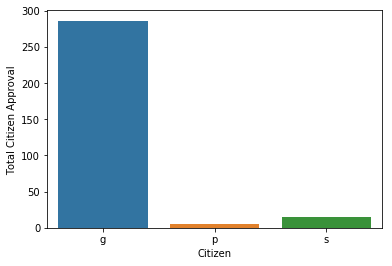

In [24]:
sns.barplot(data=citizen_df, x= 'Citizen', y= 'Total Citizen Approval')

## Preprocessing

The missing values are now successfully handled but there's still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:

1) Convert the non-numeric data into numeric

2) Split the data into train and test sets.

3) Scale the feature values to a uniform range

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for col in df:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])
        
df.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,ZipCode,Income,Approval Status,Approval Rate
0,0,58,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0,1
1,0,24,0.500,2,1,11,4,1.50,1,0,0,0,0,95,824,0,1
2,1,27,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0,1
3,1,20,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0,1
4,1,32,4.000,2,1,10,8,2.50,1,0,0,1,0,114,0,0,1


In [27]:
# Because I've already preprocessed the 'Approval Status' feature and created a new feature/column called 'Approval Rate', 
#let's now drop 'Approval Status' column

df['Approval Status'].replace({0: 1, 1: 0}, inplace=True)

In [28]:
df = df[['Gender','Age','Debt','Married','Bank Customer','Education Level','Ethnicity','Years Employed','Prior Default','Employed','Credit Score','Drivers License','Citizen','ZipCode','Income','Approval Status']]
df.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,ZipCode,Income,Approval Status
0,0,58,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,1
1,0,24,0.500,2,1,11,4,1.50,1,0,0,0,0,95,824,1
2,1,27,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,1
3,1,20,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,1
4,1,32,4.000,2,1,10,8,2.50,1,0,0,1,0,114,0,1


#### Feature Selection

We have successfully converted all the non-numeric values to numeric ones.

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

Also, features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as feature selection.

In [29]:
df.drop(['Drivers License', 'ZipCode'], axis=1, inplace=True)

In [30]:
df.head()

,Gender,Age,Debt,Married,Bank Customer,Education Level,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Citizen,Income,Approval Status
0,0,58,4.460,2,1,11,4,3.04,1,1,6,0,560,1
1,0,24,0.500,2,1,11,4,1.50,1,0,0,0,824,1
2,1,27,1.540,2,1,13,8,3.75,1,1,5,0,3,1
3,1,20,5.625,2,1,13,8,1.71,1,0,0,2,0,1
4,1,32,4.000,2,1,10,8,2.50,1,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Converting back the dataframe to numpy

df = df.values

In [34]:
X = df[:,:-1]
y = df[:,-1:].ravel()

print(X.shape)

print(y.shape)

(689, 13)
(689,)


In [35]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.3, random_state=42)

#### Feature Scaling

The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()

#We fit_tansform on the train set and only transfom on the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

Fitting a logistic regression model to the scaled train set
<p>Essentially, predicting if a credit card application will be approved or denied is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 306 (44.4%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [37]:
# Ignore FutureWarning Alert from popping up

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [38]:
from sklearn.linear_model import LogisticRegression

#Instantiate the logistic Regression

logreg = LogisticRegression()

In [39]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred = logreg.predict(X_test_scaled)

####  Making predictions and evaluating performance to know how well our model performed

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix.<p>In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied.<p/> If our model is not performing well in this aspect, then it might end up approving the application that shouldn't have been approved. The confusion matrix helps us to view our model's performance from these aspects

In [41]:
#Accuracy score of our model

print( 'The accuracy score of our logistic regression classifier is: ', logreg.score(X_test_scaled, y_test))


The accuracy score of our logistic regression classifier is:  0.8609958506224067


In [42]:
#Import Confusion_Matrix and Classification_Report
      
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[231  39]
 [ 28 184]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       270
         1.0       0.83      0.87      0.85       212

   micro avg       0.86      0.86      0.86       482
   macro avg       0.86      0.86      0.86       482
weighted avg       0.86      0.86      0.86       482



In [44]:
#computing the cross_val_score

from sklearn.model_selection import cross_val_score
cv = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
print(cv)

[0.88095238 0.83333333 0.80952381 0.87804878 0.85      ]


## Improving model peformance with GridSearch

Our model was pretty good! It was able to yield an accuracy score of 86%.

For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.

Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy.
Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:

tol

max_iter

In [45]:

# Define the grid of values for tol and max_iter

tol = [0.01, 0.001,0.0001]
max_iter = [100,150,200]
c_space = np.logspace(-5, 8, 15)
#param_grid = {'C': c_space}

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param = dict(C = c_space, tol = tol, max_iter = max_iter)


In [46]:
#Import GridSearchCV

from sklearn.model_selection import GridSearchCV

#Instantiate a GridSearchCV with the the required parameters

logreg_CV = GridSearchCV(logreg, param_grid = param, cv= 5)

In [47]:
# Rescale the original X value

X_rescaled = scaler.fit_transform(X)

# Fit the logreg_CV model

logreg_CV.fit(X_rescaled, y)

#Summarizing the result

best_score, best_params = logreg_CV.best_score_, logreg_CV.best_params_

print(f"The accuracy score of our Logreg_Grid classifer is {best_score} : using {best_params}")

The accuracy score of our Logreg_Grid classifer is 0.8519593613933236 : using {'C': 0.05179474679231213, 'max_iter': 100, 'tol': 0.01}


### Summary

While building this credit card application predictor, we tackled some of the most widely-known preprocessing steps such as scaling, label encoding, and missing value imputation. We finished with some machine learning to predict if a person's application for a credit card would get approved or not given some information about that person. 

Our initial Model accuracy is <b>0.86</b>, suprisingly after applying GridSearchCV to improve the model perfromance, our model performance droped to<b> 0.85 </b> after fine-tuning our regularization parameter (C) and GridSearch hyperparameters (max_iter, and tol)

### What Next?

Use Decision Tree, Random Forest, XGBoost, and SVM to train our model to see if there'll be any tangible improvement on the model accuracy.
